In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns

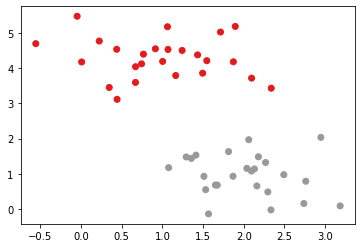

In [2]:
from sklearn.datasets._samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers= 2, random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0],X[:,1], c=y, cmap=plt.cm.Set1)

(-1.0, 3.5)

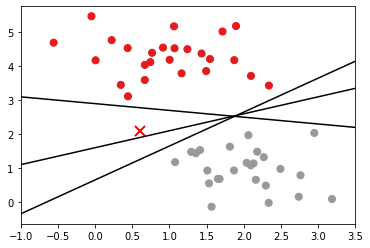

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap=plt.cm.Set1)
plt.plot([0.6],[2.1],'x', c='r',markeredgewidth=2, markersize=10)

for m,b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m*xfit + b,'-k')
plt.xlim(-1,3.5)

(-1.0, 3.5)

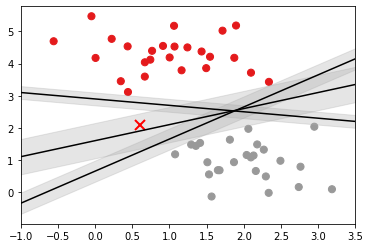

In [4]:
# maximizing
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap=plt.cm.Set1)
plt.plot([0.6],[2.1],'x', c='r',markeredgewidth=2, markersize=10)

for m,b,d in [(1, 0.65,0.33), (0.5, 1.6,0.55), (-0.2, 2.9,0.2)]:
    yfit =  m*xfit + b
    plt.plot(xfit,yfit,'-k')
    plt.fill_between(xfit,yfit-d,yfit+d, edgecolor ='none',
        color ='#AAAAAA',alpha=0.3)

plt.xlim(-1,3.5)

In [5]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels =[-1,0,1], alpha = 0.5, linestyles=['--','-','--'])

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   c='none',
                   s=300, linewidth=1,edgecolors='k')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)



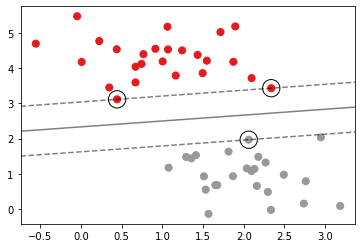

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Set1)
plot_svc_decision_function(model,plot_support=True)

In [8]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

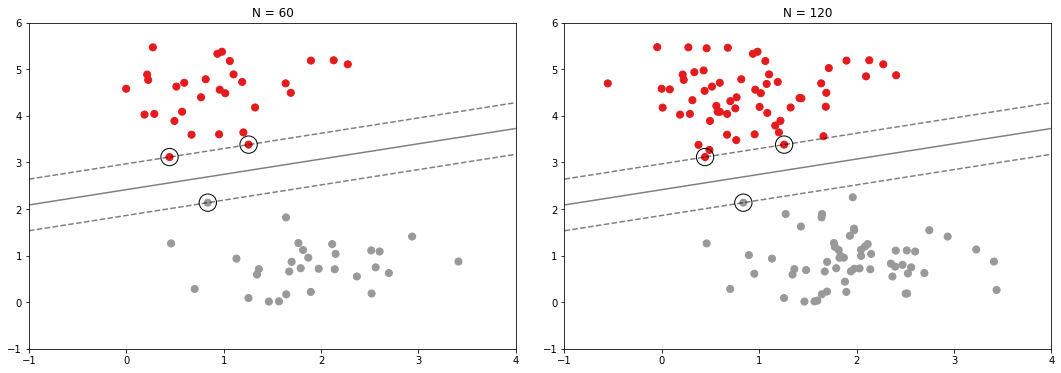

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Set1)
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

# Kernel SVM

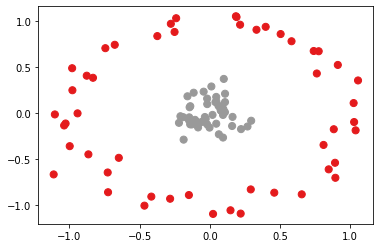

In [10]:
from sklearn.datasets._samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:,1], c=y, s=50, cmap=plt.cm.Set1)

In [11]:
r = np.exp(-(X ** 2).sum(1))

In [17]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap=plt.cm.Set1)
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90,30,-45,180], azip=(-180, 180),X=fixed(X), y=fixed(y))


interactive(children=(Dropdown(description='elev', index=2, options=(-90, 90, 30, -45, 180), value=30), IntSli…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.67744861,  0.73878444],
       [-0.87710489,  0.40392091],
       [-0.10528779, -0.07420885],
       [ 0.19061273,  1.0392628 ],
       [ 0.04014891,  0.11802126],
       [ 0.65533676, -0.88079466],
       [ 0.3982511 ,  0.93326606],
       [ 0.89507259, -0.70171969],
       [-0.64853319, -0.48550374],
       [ 0.22272004, -0.17451362],
       [-1.1043083 , -0.01547617],
       [-0.46586241, -1.00351124],
       [-0.74439724,  0.7021023 ],
       [-0.14837318, -0.07870748],
       [ 0.04591306, -0.11585839],
       [ 0.10841297,  0.11793605],
       [ 0.29493379, -0.08369524],
       [-0.11505287,  0.21983699],
       [ 0.09201688,  0.00863055],
       [-0.13995246, -0.12283605],
       [-0.21983427, -0.10651527],
       [-0.23978616,  1.02651109],
       [ 0.01939104, -0.02046849],
       [ 0.06457866, -0.23056443],
       [ 0.77620559,  0.6689333 ],
       [ 0.04703436,  0.12340744],
       [-0.0351115 , -0.04326392],
       [

In [18]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

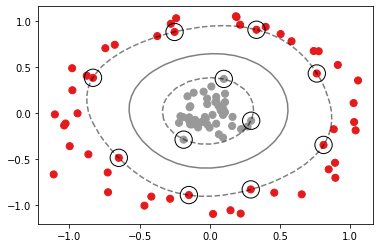

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Set1)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

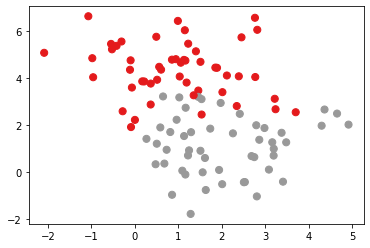

In [22]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Set1)

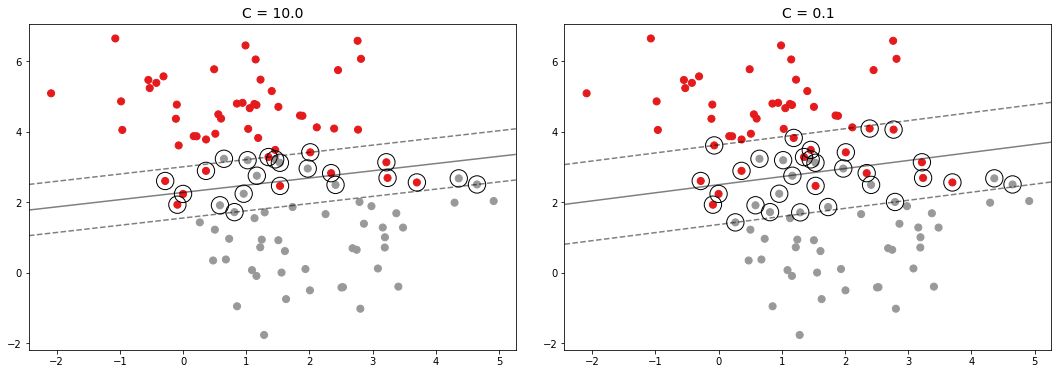

In [28]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Set1)
    
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none')
    
    axi.set_title('C = {0:.1f}'.format(C), size=14)


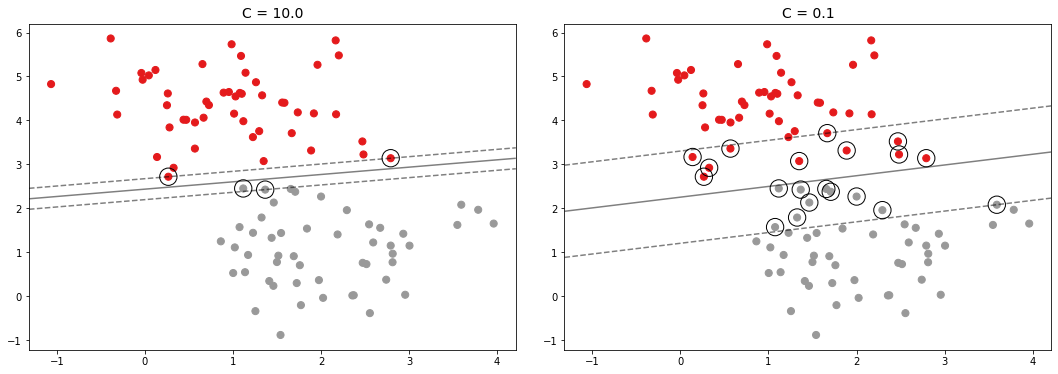

In [31]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Set1)
    
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none')
    
    axi.set_title('C = {0:.1f}'.format(C), size=14)
